In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
athletes = pd.read_csv("data/athlete_events.csv")
regions = pd.read_csv("data/noc_regions.csv")

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df = pd.merge(athletes,regions, on="NOC")

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [8]:
df.duplicated().sum()

1385

In [9]:
df.shape

(270767, 17)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
region        21
notes     264347
dtype: int64

In [13]:
df["Medal"].unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [14]:
df["Medal"].fillna("No medal",inplace=True)

In [15]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region        21
notes     264347
dtype: int64

In [16]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN


 ## 1. Season - wise Medal Tally

In [17]:
df["Season"].value_counts()

Season
Summer    220818
Winter     48564
Name: count, dtype: int64

In [18]:
summer = df[df["Season"]=="Summer"]
winter = df[df["Season"]=="Winter"]

In [19]:
summer.shape

(220818, 17)

In [20]:
winter.shape

(48564, 17)

 Removing the Dublicate Medals given to all the team members

In [21]:
summer=summer.drop_duplicates(subset=["Team","NOC","Games","Year","Season","City","Sport","Event"])

In [22]:
summer.shape

(98657, 17)

In [23]:
winter=winter.drop_duplicates(subset=["Team","NOC","Games","Year","Season","City","Sport","Event"])

In [24]:
winter.shape

(16956, 17)

Medal  Count summer

In [25]:
medal_counts_summer = summer.groupby(["NOC","Medal"]).size().reset_index(name="Count")

In [26]:
medal_counts_summer.head()

,NOC,Medal,Count
0,AFG,Bronze,2
1,AFG,No medal,75
2,AHO,No medal,58
3,AHO,Silver,1
4,ALB,No medal,57


Counting in pivot table

In [27]:
medal_pivot_summer = medal_counts_summer.pivot(index="NOC",columns="Medal",values="Count").fillna(0)

In [28]:
medal_pivot_summer

Medal,Bronze,Gold,No medal,Silver
NOC,,,,
AFG,2.0,0.0,75.0,0.0
AHO,0.0,0.0,58.0,1.0
ALB,0.0,0.0,57.0,0.0
ALG,7.0,4.0,359.0,1.0
AND,0.0,0.0,45.0,0.0
...,...,...,...,...
YEM,0.0,0.0,32.0,0.0
YMD,0.0,0.0,5.0,0.0
YUG,24.0,19.0,608.0,27.0


In [29]:
medal_pivot_summer = medal_pivot_summer.astype(int)

In [30]:
medal_pivot_summer

Medal,Bronze,Gold,No medal,Silver
NOC,,,,
AFG,2,0,75,0
AHO,0,0,58,1
ALB,0,0,57,0
ALG,7,4,359,1
AND,0,0,45,0
...,...,...,...,...
YEM,0,0,32,0
YMD,0,0,5,0
YUG,24,19,608,27


In [31]:
medal_pivot_summer["Total_medal"] = medal_pivot_summer[["Gold","Silver","Bronze"]].sum(axis=1)

In [32]:
medal_pivot_summer 

Medal,Bronze,Gold,No medal,Silver,Total_medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


sorting Based on the no of medal win

In [33]:
summer_medal_winner=medal_pivot_summer.sort_values(by=["Gold","Silver","Bronze"],ascending=False)

In [34]:
summer_medal_winner

Medal,Bronze,Gold,No medal,Silver,Total_medal
NOC,,,,,
USA,371,622,3037,398,1391
URS,179,279,873,206,664
GBR,202,182,3157,207,591
GER,207,177,2093,186,570
FRA,212,163,3071,166,541
...,...,...,...,...,...
VIN,0,0,33,0,0
VNM,0,0,38,0,0
YAR,0,0,11,0,0


winter medal count

In [35]:
medal_counts_winter = winter.groupby(["NOC","Medal"]).size().reset_index(name="Count")

In [36]:
medal_counts_winter

,NOC,Medal,Count
0,AHO,No medal,3
1,ALB,No medal,7
2,ALG,No medal,9
3,AND,No medal,69
4,ARG,No medal,169
...,...,...,...
222,VEN,No medal,5
223,YUG,Bronze,1
224,YUG,No medal,167
225,YUG,Silver,1


In [37]:
medal_pivot_winter= medal_counts_summer.pivot(index="NOC",columns="Medal",values="Count").fillna(0)

In [38]:
medal_pivot_winter

Medal,Bronze,Gold,No medal,Silver
NOC,,,,
AFG,2.0,0.0,75.0,0.0
AHO,0.0,0.0,58.0,1.0
ALB,0.0,0.0,57.0,0.0
ALG,7.0,4.0,359.0,1.0
AND,0.0,0.0,45.0,0.0
...,...,...,...,...
YEM,0.0,0.0,32.0,0.0
YMD,0.0,0.0,5.0,0.0
YUG,24.0,19.0,608.0,27.0


In [39]:
medal_pivot_winter =medal_pivot_winter.astype(int)

In [40]:
medal_pivot_winter

Medal,Bronze,Gold,No medal,Silver
NOC,,,,
AFG,2,0,75,0
AHO,0,0,58,1
ALB,0,0,57,0
ALG,7,4,359,1
AND,0,0,45,0
...,...,...,...,...
YEM,0,0,32,0
YMD,0,0,5,0
YUG,24,19,608,27


In [41]:
medal_pivot_winter["Total_medal"] = medal_pivot_winter[["Gold","Silver","Bronze"]].sum(axis=1)

In [42]:
medal_pivot_winter

Medal,Bronze,Gold,No medal,Silver,Total_medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


In [43]:
winter_medal_winner = medal_pivot_winter.sort_values(by=["Gold","Silver","Bronze"],ascending=False)

In [44]:
winter_medal_winner

Medal,Bronze,Gold,No medal,Silver,Total_medal
NOC,,,,,
USA,371,622,3037,398,1391
URS,179,279,873,206,664
GBR,202,182,3157,207,591
GER,207,177,2093,186,570
FRA,212,163,3071,166,541
...,...,...,...,...,...
VIN,0,0,33,0,0
VNM,0,0,38,0,0
YAR,0,0,11,0,0


## 2.Country -Wise Medal Tally

In [45]:
medal_pivot_summer

Medal,Bronze,Gold,No medal,Silver,Total_medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


In [46]:
def fetch_noc(noc,pivot_table):
    if noc in pivot_table.index:
        details = {
            "Gold": pivot_table.loc[noc,"Gold"],
            "Silver": pivot_table.loc[noc,"Silver"],
            "Bronze": pivot_table.loc[noc,"Bronze"],
            "Total_medal": pivot_table.loc[noc,"Total_medal"]
        }
        return details
    else:
        print("No Noc exits")

In [47]:
fetch_noc("IND",medal_pivot_summer)

{'Gold': 9, 'Silver': 6, 'Bronze': 11, 'Total_medal': 26}

# Year Wise Search

In [48]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No medal,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No medal,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No medal,China,NaN


In [49]:
summer.shape

(98657, 17)

In [50]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3119
Height    17827
Weight    18182
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region       20
notes     96593
dtype: int64

In [51]:
summer.dropna(subset=["region"],inplace=True)

In [52]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3118
Height    17823
Weight    18180
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        0
notes     96593
dtype: int64

In [53]:
medals_count = summer.groupby(["Year","region","Medal"]).size().unstack(fill_value=0)

In [54]:
medals_count

Medal                         Bronze  Gold  No medal  Silver
Year region                                                 
1896 Australia                     1     2         2       0
     Austria                       2     2         3       1
     Denmark                       3     1         6       2
     France                        2     1        11       4
     Germany                       1     4        21       1
...                              ...   ...       ...     ...
2016 Virgin Islands, British       0     0         4       0
     Virgin Islands, US            0     0         7       0
     Yemen                         0     0         3       0
     Zambia                        0     0         7       0
     Zimbabwe                      0     0        13       0

[2769 rows x 4 columns]

In [55]:
medals_count =medals_count.reset_index()

In [56]:
medals_count

Medal,Year,region,Bronze,Gold,No medal,Silver
0,1896,Australia,1,2,2,0
1,1896,Austria,2,2,3,1
2,1896,Denmark,3,1,6,2
3,1896,France,2,1,11,4
4,1896,Germany,1,4,21,1
...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0
2765,2016,"Virgin Islands, US",0,0,7,0
2766,2016,Yemen,0,0,3,0
2767,2016,Zambia,0,0,7,0


In [57]:
medals_count["Total_medal"]=medals_count["Gold"]+ medals_count["Silver"]+ medals_count["Bronze"]

In [58]:
medals_count

Medal,Year,region,Bronze,Gold,No medal,Silver,Total_medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [59]:
def plot_medals(year,country,df):

    filter_df = df[(df["Year"]==year) & (df["region"]==country)]
    gold = filter_df["Gold"].values[0]
    silver = filter_df["Silver"].values[0]
    bronze = filter_df["Gold"].values[0]
    gold = filter_df["Gold"].values[0]
    total_medal = filter_df["Total_medal"].values[0]
    
    fig,ax = plt.subplots()
    medals = ["Gold","Silver","Bronze", "Total_medal"]
    counts = [gold, silver ,bronze , total_medal]
    ax.bar(medals,counts, color=["gold","silver","brown","green"])
    plt.show()
    

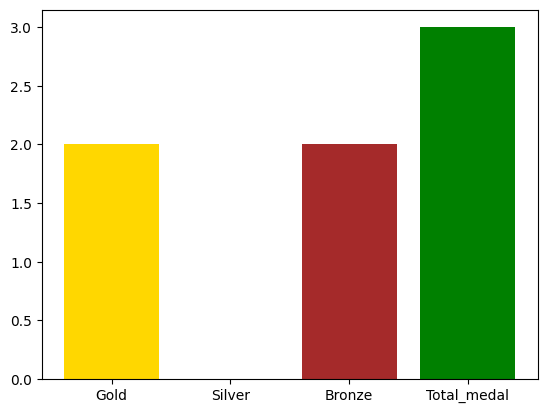

In [60]:
plot_medals(1896, "Australia",medals_count)

## year wise progress of a country

In [61]:
medals_count

Medal,Year,region,Bronze,Gold,No medal,Silver,Total_medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [76]:
def plot_year_progress(country,df):
    filtered_df = df[df["region"]==country]
    fig,ax = plt.subplots()
    ax.plot(filtered_df["Year"],filtered_df["Gold"],color="gold",label="GOLD",marker='o',linestyle="--")
    ax.plot(filtered_df["Year"],filtered_df["Silver"],color="silver",label="SILVER",marker='o',linestyle="--")
    ax.plot(filtered_df["Year"],filtered_df["Bronze"],color="brown",label="BORNZE",marker='o',linestyle="--")
    ax.plot(filtered_df["Year"],filtered_df["Total_medal"],color="green",label="TOTAL MEDALS",marker='o',linestyle="--")
    ax.legend()
    plt.show()

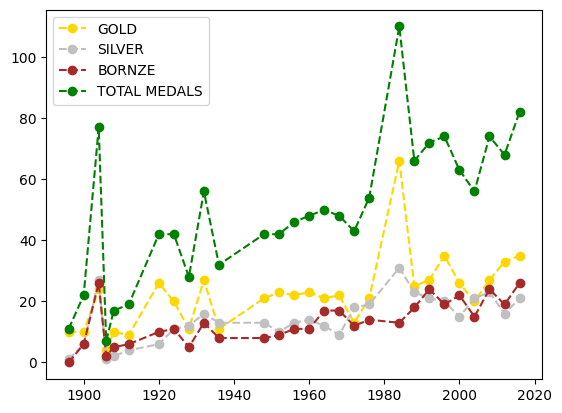

In [77]:
plot_year_progress("USA",medals_count)